In [ ]:
# loading packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a id="section-one"></a>
# Importing the Dataset

In [ ]:
train_data = pd.read_csv("/content/train.csv")
test_data =  pd.read_csv("/content/test.csv")

In [ ]:
df = train_data.copy()
air_test=test_data.copy()
air_training=df.copy()

In [ ]:
air_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.00,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.00,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.00,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.00,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.00,satisfied


In [ ]:
df.columns=df.columns.str.replace(" ","_")
df.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


<a id="section-two"></a>
# Defining The Functions

In [ ]:
#Seaborn settings for great visualizations!

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ
def dataexploration(dataframe):
    print("-------------------DATA EXPLORATION------------------------")
    print("We have {} rows and {} columns in our dataset.".format(dataframe.shape[0],dataframe.shape[1]))
    print("We have {} Null values in our dataset".format(dataframe.isnull().sum().sum()))
    print("------DATA TYPES--------")
    print(dataframe.dtypes)

In [ ]:
dataexploration(df)

-------------------DATA EXPLORATION------------------------
We have 103904 rows and 25 columns in our dataset.
We have 310 Null values in our dataset
------DATA TYPES--------
Unnamed:_0                             int64
id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handlin

<a id="section_2_1"></a>
# Let's get to know more about our dataset

#### <b/> Most of the integer columns shows the satisfaction level of a customer in given topics (1 to 5) 5 --> Great / 0 --> Very Bad

In [ ]:
summary(df.drop(columns=["id","Unnamed:_0"])).style.background_gradient(cmap='Blues')

data shape: (103904, 23)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
Gender,object,0,0.000000,2,nan,nan,nan,nan,Male,Male,Female
Customer_Type,object,0,0.000000,2,nan,nan,nan,nan,Loyal Customer,disloyal Customer,Loyal Customer
Age,int64,0,0.000000,75,7.000000,85.000000,39.379706,15.114964,13,25,26
Type_of_Travel,object,0,0.000000,2,nan,nan,nan,nan,Personal Travel,Business travel,Business travel
Class,object,0,0.000000,3,nan,nan,nan,nan,Eco Plus,Business,Business
Flight_Distance,int64,0,0.000000,3802,31.000000,4983.000000,1189.448375,997.147281,460,235,1142
Inflight_wifi_service,int64,0,0.000000,6,0.000000,5.000000,2.729683,1.327829,3,3,2
Departure/Arrival_time_convenient,int64,0,0.000000,6,0.000000,5.000000,3.060296,1.525075,4,2,2
Ease_of_Online_booking,int64,0,0.000000,6,0.000000,5.000000,2.756901,1.398929,3,3,2
Gate_location,int64,0,0.000000,6,0.000000,5.000000,2.976883,1.277621,1,3,2


<a id="section_2_2"></a>

####  After Looking at the table above there are some Insights that we need to keep in mind

 * <b/> We have only 2 types of customers

 *  Our Age range is 78 which means we have broad range of customers in terms of age.

 * We have 3 types of Class in our Planes

 * All of our null values are in "Arrival Delay in Minutes" column for this reason I am going to assume that Null Values are equal to median of all values because the people who are taking this survey might left that blank or did not remember the delay.

In [ ]:
#Replace missing values in 'Arrival.Delay.in.Minutes' with median in Training Dataset
df_median = df['Arrival_Delay_in_Minutes'].median()
df['Arrival_Delay_in_Minutes'].fillna(df_median, inplace=True)


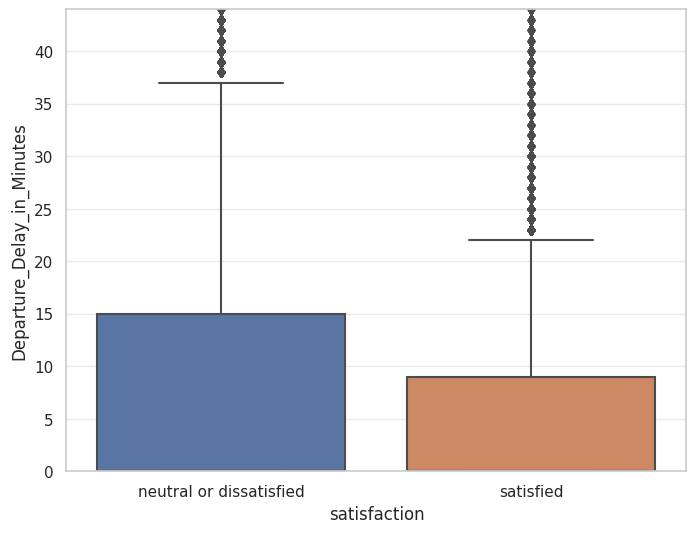

In [ ]:

# Convert the 'satisfaction' column to categorical
df['satisfaction'] = pd.Categorical(df['satisfaction'])

# Create the boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Departure_Delay_in_Minutes', data=df)
plt.ylim(df['Departure_Delay_in_Minutes'].quantile(0.1),
         df['Departure_Delay_in_Minutes'].quantile(0.9))
plt.show()

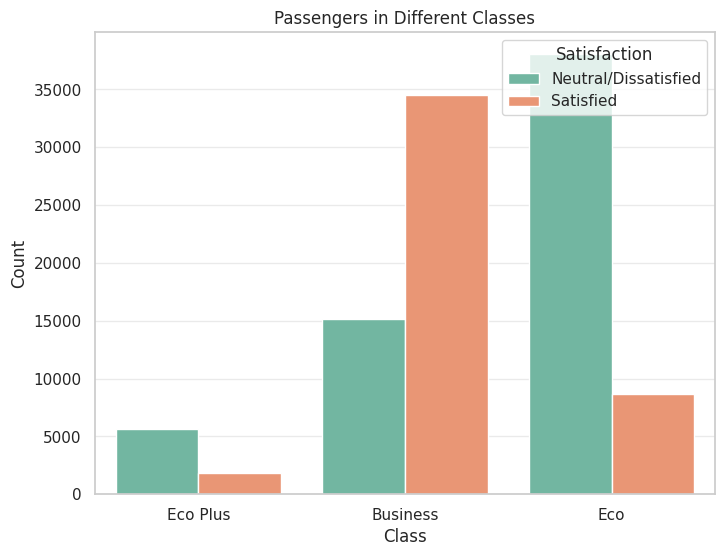

In [ ]:
# Convert categorical variables to binary indicators
air_training['Gender'] = air_training['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
air_training['Customer Type'] = air_training['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
air_training['Type of Travel'] = air_training['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)
air_training['Business'] = air_training['Class'].apply(lambda x: 1 if x == 'Business' else 0)
air_training['EcoPlus'] = air_training['Class'].apply(lambda x: 1 if x == 'Eco Plus' else 0)
air_training['satisfaction'] = air_training['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Plot passengers in Different Classes (economy, plus, business)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='satisfaction', data=air_training, palette="Set2")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Passengers in Different Classes")
plt.legend(title="Satisfaction", loc='upper right', labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

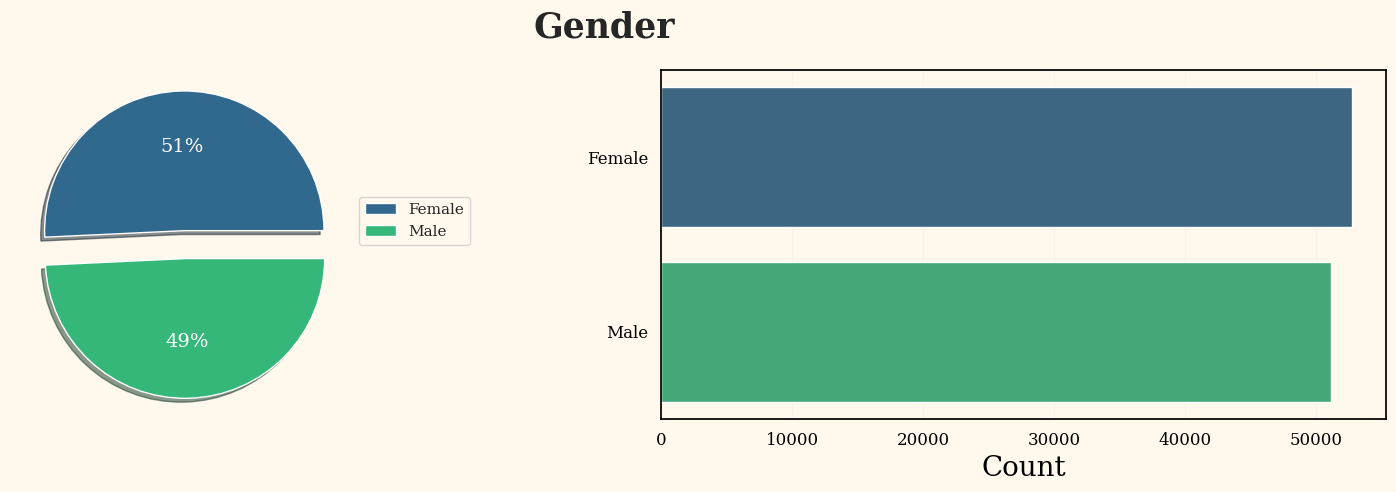

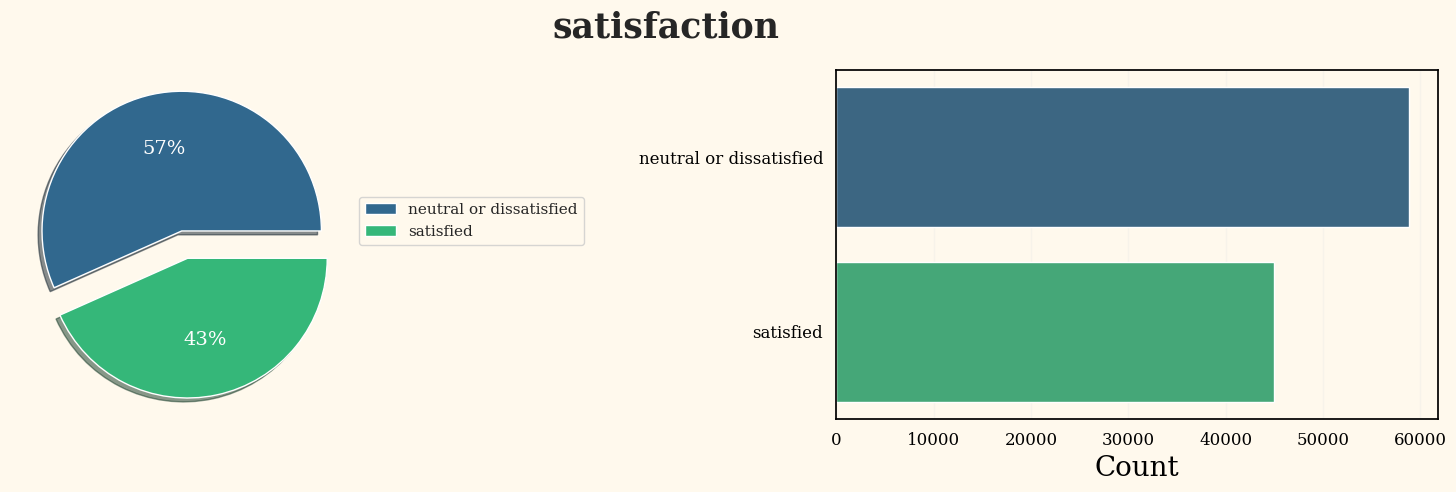

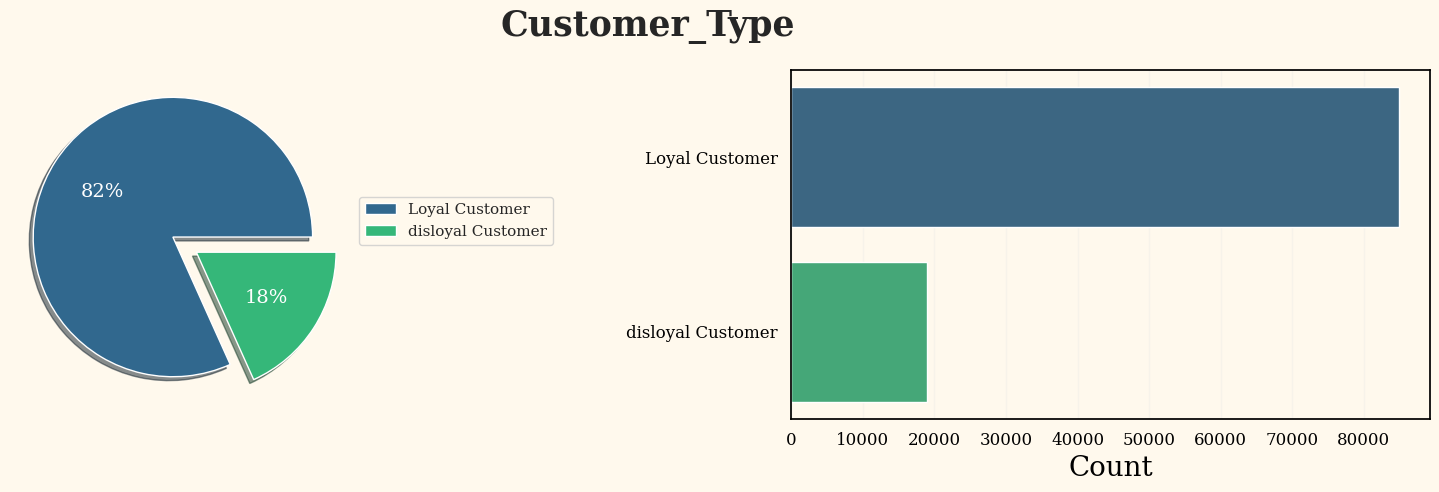

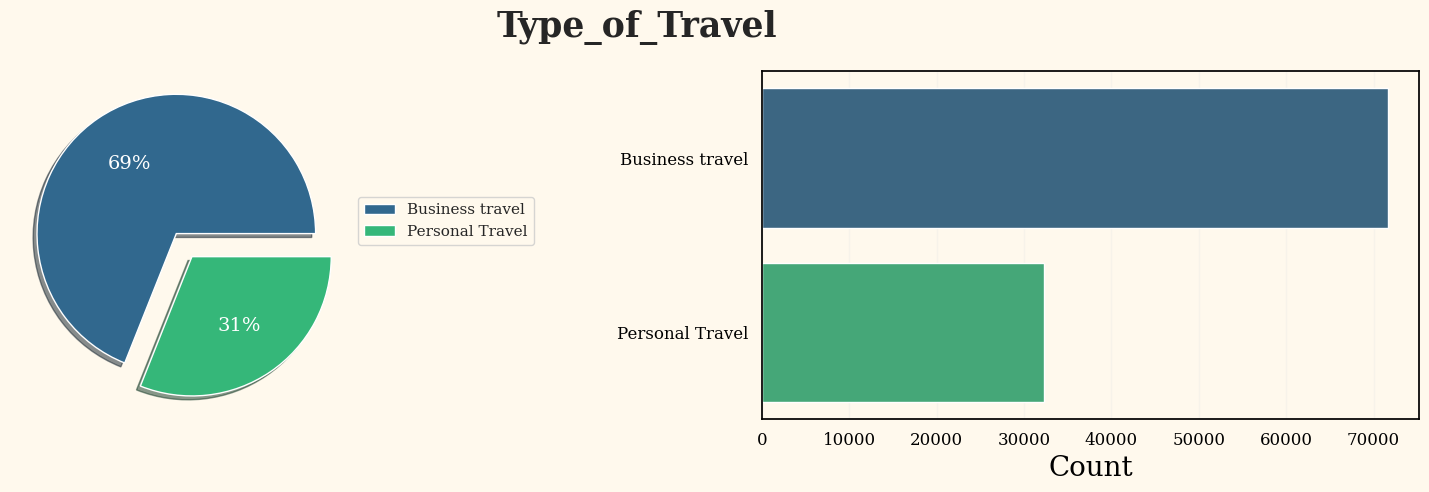

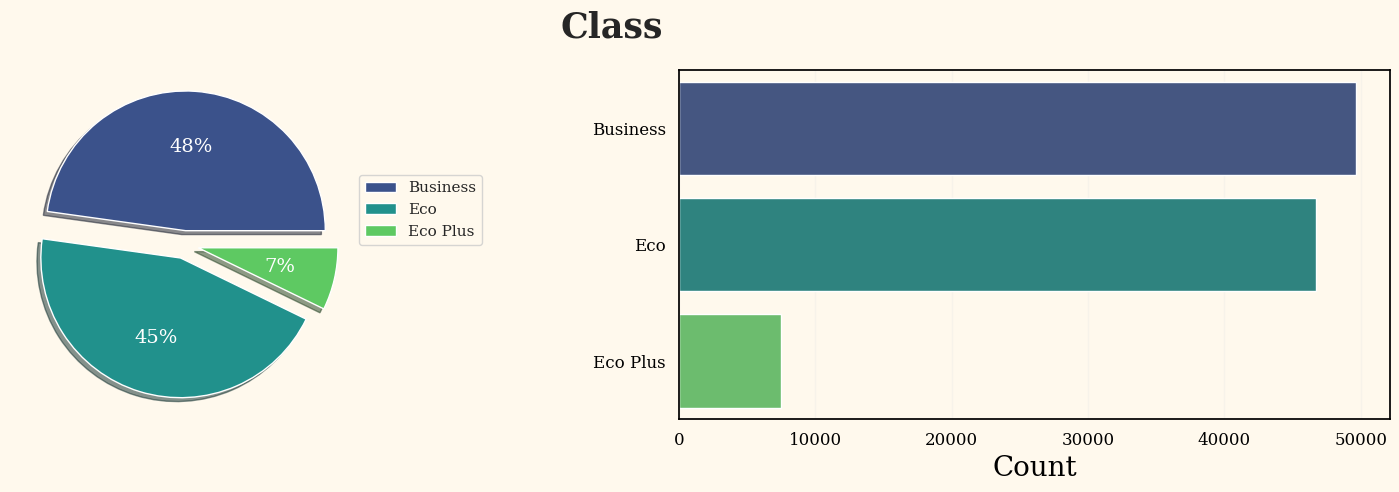

In [ ]:

columns_to_look = ["Gender","satisfaction","Customer_Type","Type_of_Travel","Class"]
for x in columns_to_look:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts()
    labels = value_counts.index.tolist()

    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))

    ######################################################################################

    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors, order=labels)
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


<a id="section_3_1"></a>

## Here are the Insights of the graphs.
 * 69% of our customers are using our airplane services for business purposes

 * According to this survey only 43% of our customers are satisfied with our services.But this might be misleading because according to this survey 82% of our customers Loyal Customers who used our services more than once.

* Our number of Economy Class customers are little bit higher than Business Class customers.

* The number of Woman customers are little bit higher than Male Customers


                        

## Let's have a look at the Distributions of our data

In [ ]:
def plot_numeric_kde_boxplot(train_df,numeric_cols):
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))

        sns.histplot(train_df, x=col, palette=default_palette, kde=True,
                     color='orange', ax=axes[0], label=f'{col}')


        sns.boxplot(train_df, y=col, color='Green', ax=axes[1])
        axes[0].legend()

        fig.suptitle(f'Numeric Feature : {col}', fontsize=16, fontweight='bold')
        fig.subplots_adjust(wspace=0.2)
        plt.show()


In [ ]:
numeric_cols=df.drop(columns=["id"]).select_dtypes("number")
numeric_dist_v1=numeric_cols[["Age","Flight_Distance"]]

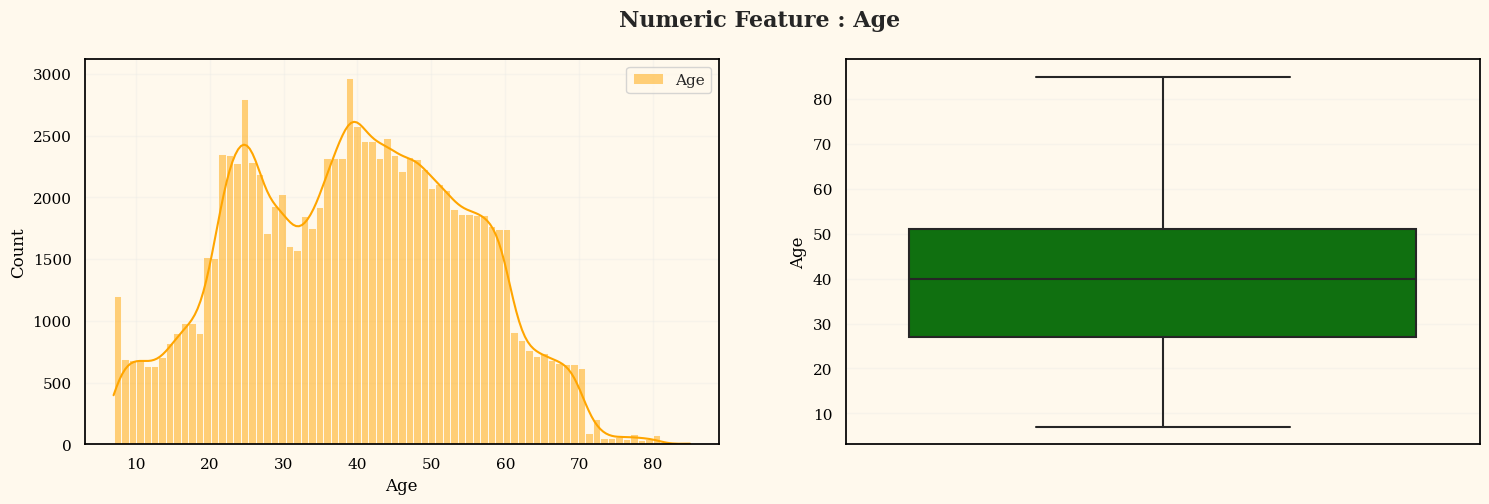

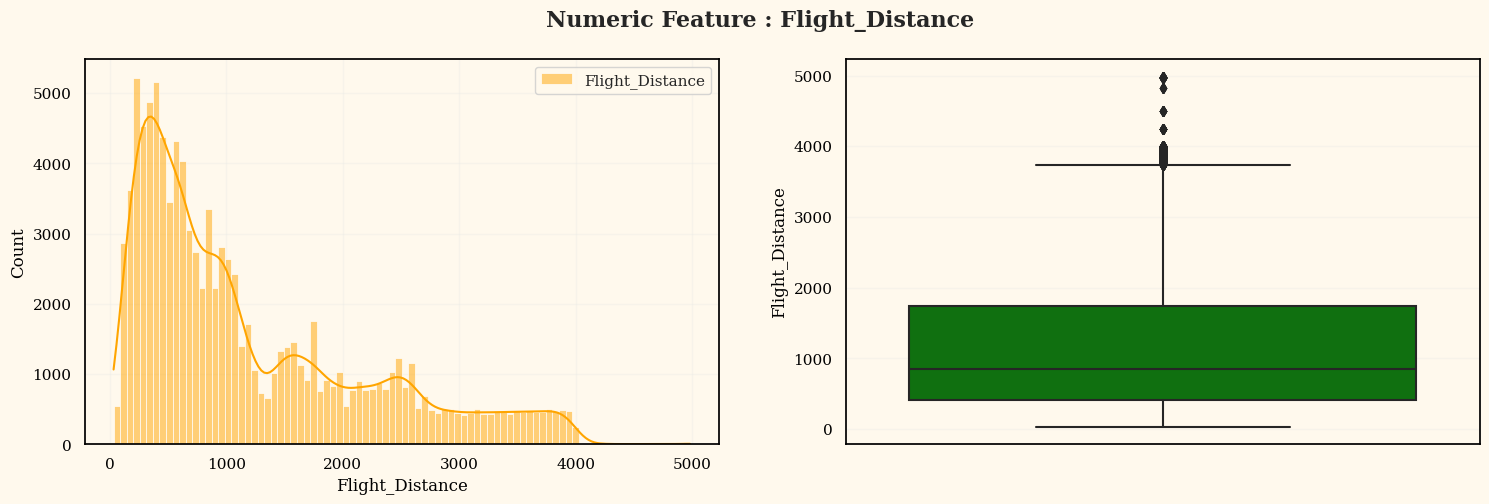

In [ ]:
plot_numeric_kde_boxplot(df,numeric_dist_v1)

In [ ]:
df["Flight_Distance"].skew()

1.1094656676620138

In [ ]:
df[["Flight_Distance","Age"]].describe()

,Flight_Distance,Age
count,"103,904.00","103,904.00"
mean,"1,189.45",39.38
std,997.15,15.11
min,31.00,7.00
25%,414.00,27.00
50%,843.00,40.00
75%,"1,743.00",51.00
max,"4,983.00",85.00


In [ ]:
len(df[df["Age"]>17])/df.shape[0]*100

92.36699260856174

<a id="section_3_2"></a>
## Key Insights
* Our minimum Flight Distance is 31km ////Maximum Flight Distance -->4983km

* Only 25% of flights are more than 1743 km

* 92% of our customers are Adults

* Our Flight Distance distribution is similar to *curve bell*,but it has a "positive skew"  which means our values are tend to be the left side of our distribution.



In [ ]:
df.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [ ]:
inflight_services_rating = ["Inflight_service","Inflight_wifi_service","Food_and_drink","Seat_comfort","Inflight_entertainment","On-board_service","Leg_room_service","Cleanliness"]

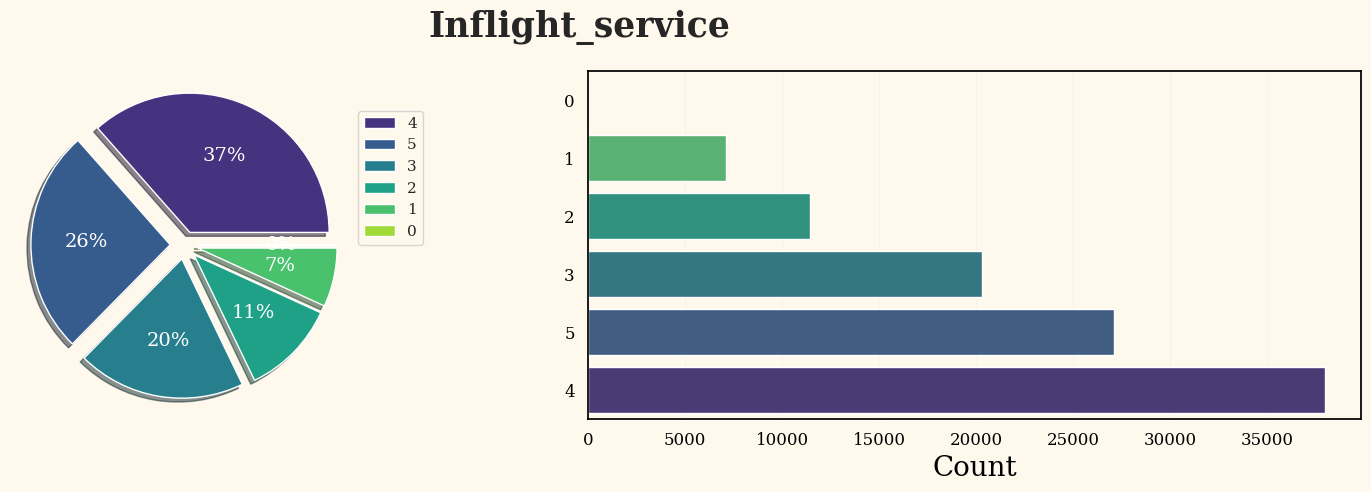

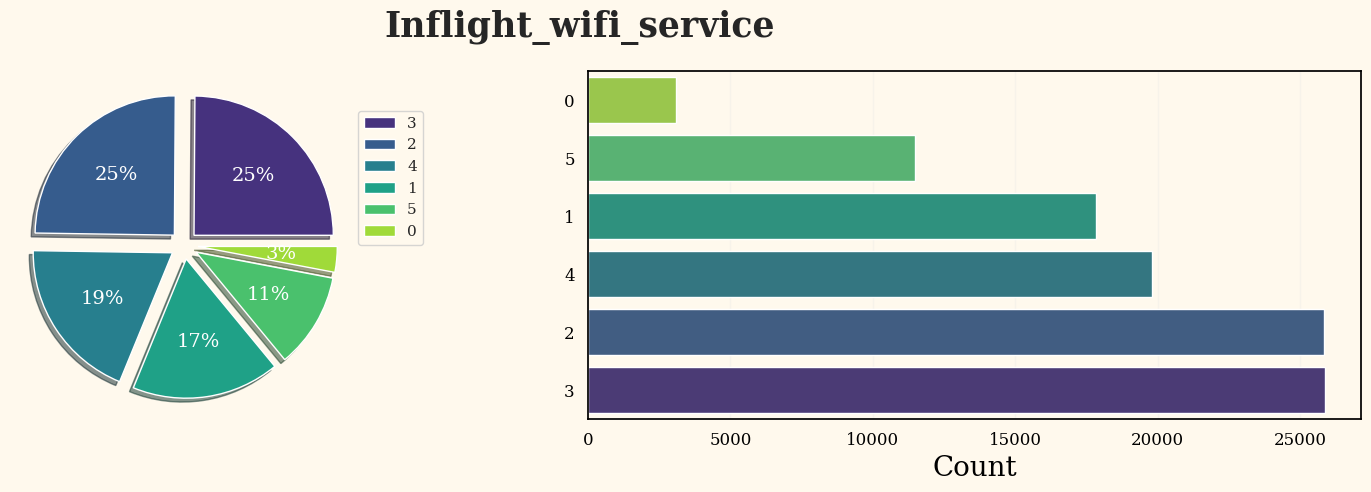

In [ ]:
for x in inflight_services_rating[0:2]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts()
    labels = value_counts.index.tolist()

    # Plot the pie chart
    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))

    # Plot the count plot
    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors[::-1], order=value_counts.index[::-1])
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


<a id="section_3_4"></a>
##  Key Insights for Inflight Services-1

* 63%  of our customers are happy with the Inflight Services

* Most of our customers are not happy with the Wifi Service that we provide.


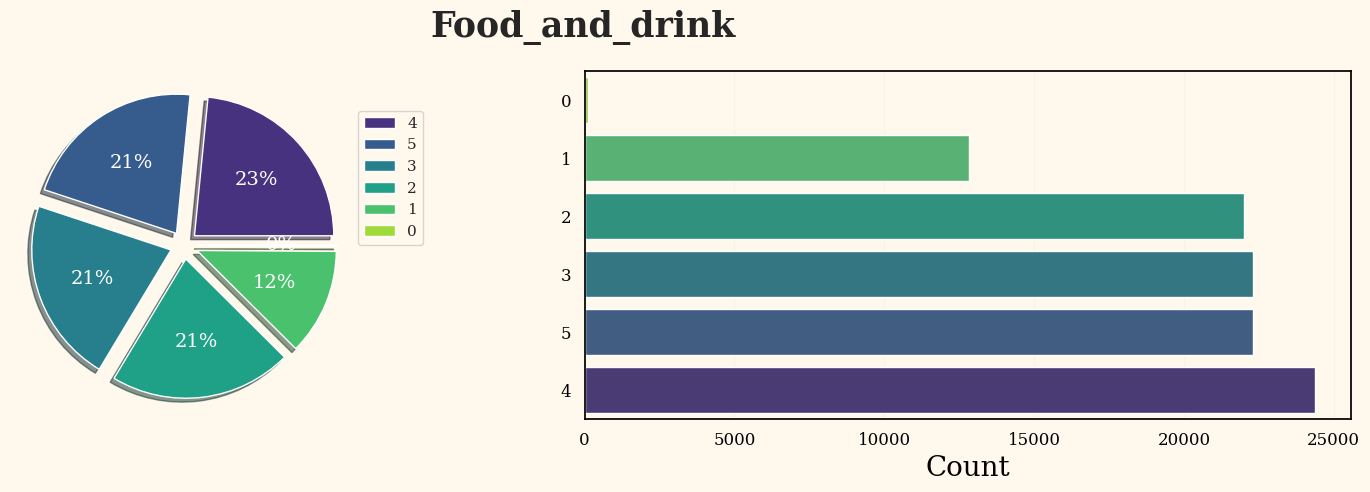

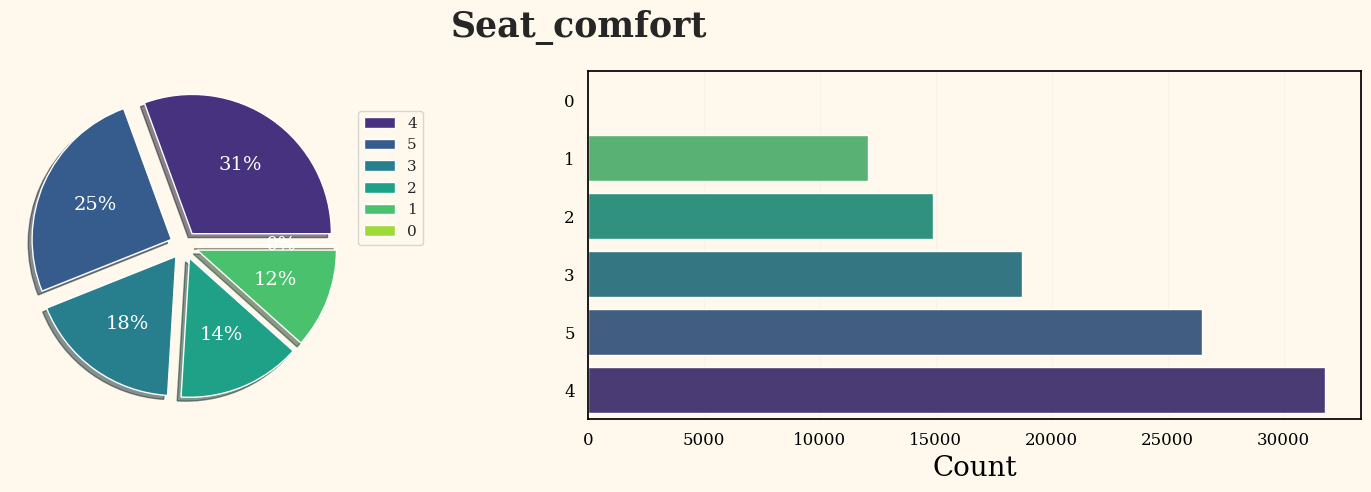

In [ ]:
for x in inflight_services_rating[2:4]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts()
    labels = value_counts.index.tolist()

    # Plot the pie chart
    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))

    # Plot the count plot
    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors[::-1], order=value_counts.index[::-1])
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


<a id="section_3_5"></a>

## Key Insights for Flight Service-2

* 1/3 people are not satisfied with the food and drink service

* 26% of the people are not satisfied with the seats of the plane

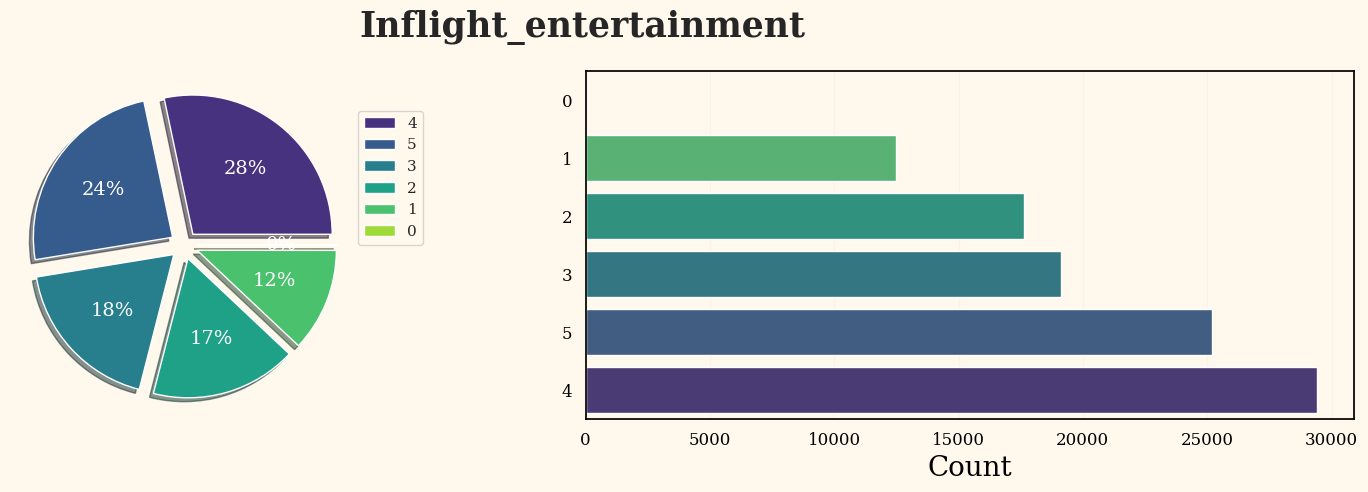

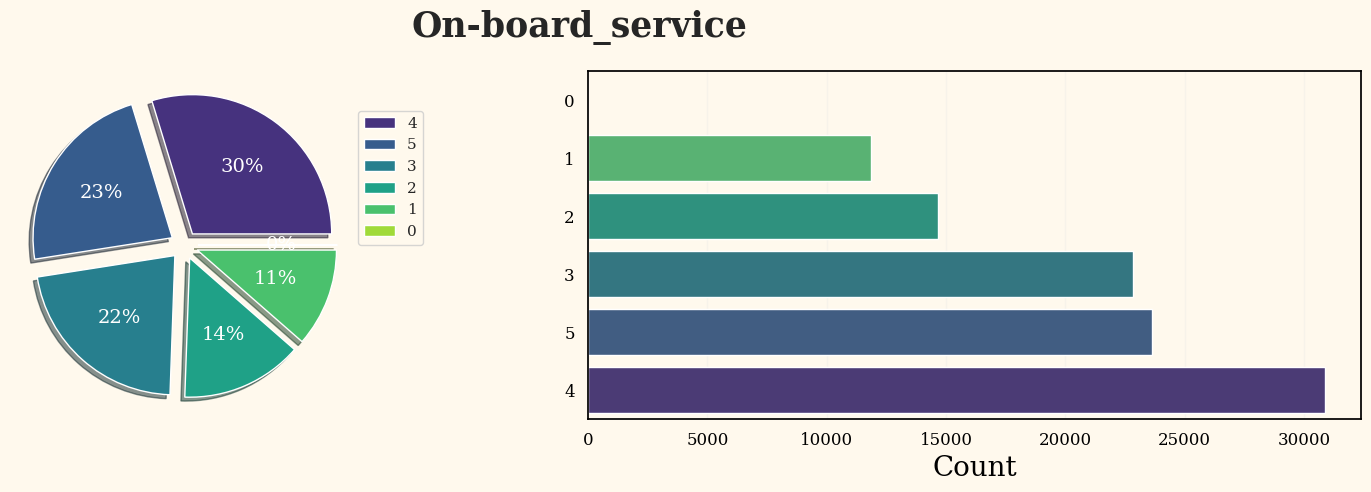

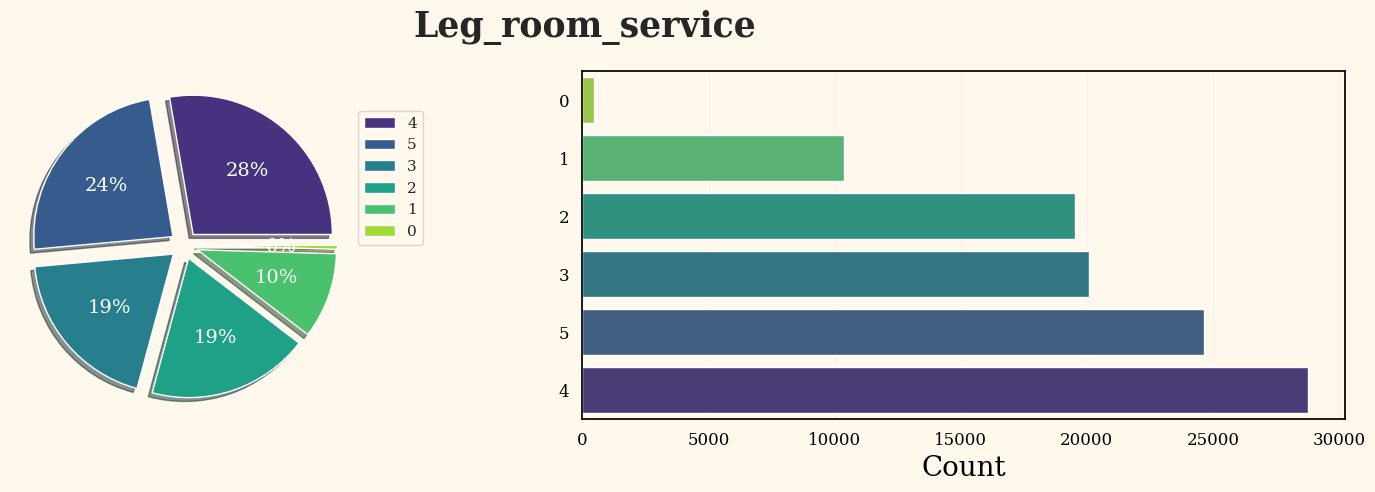

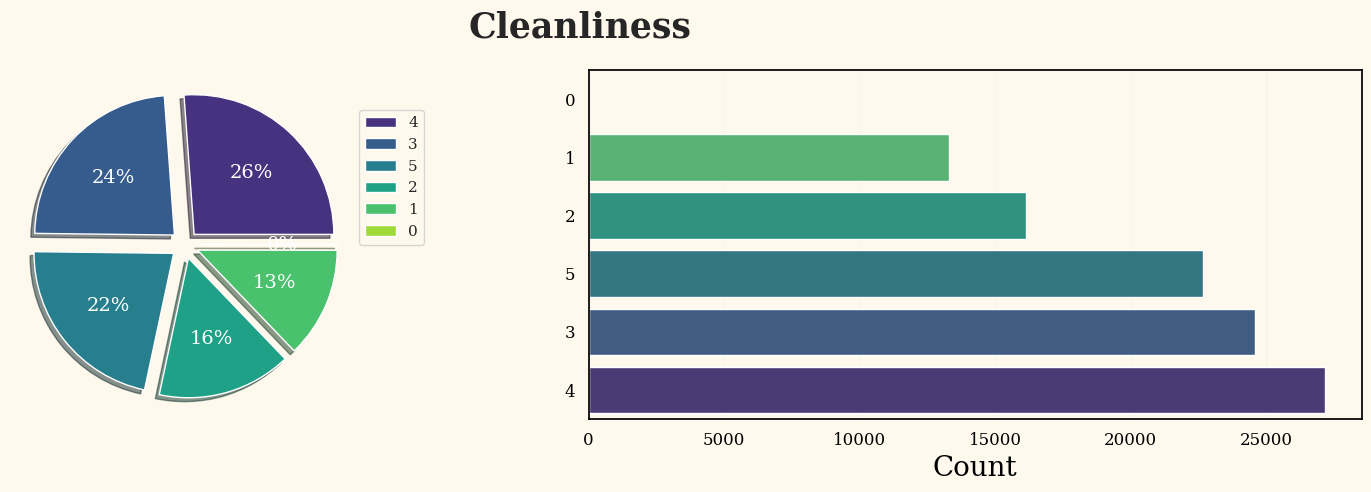

In [ ]:
for x in inflight_services_rating[4:8]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts()
    labels = value_counts.index.tolist()

    # Plot the pie chart
    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))

    # Plot the count plot
    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors[::-1], order=value_counts.index[::-1])
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


<a id="section_3_6"></a>

## Key Insights for Flight Service-3

* Most of the people are satisfied/neutral about General Inflight Entertainment

* 1/4 of the people are not satisfied with the on-board service

* Nearly 30% of the people are not satisfied Leg Service and Cleanliness of the plane

In [ ]:
airport_service = ["Gate_location","Baggage_handling","Checkin_service"]

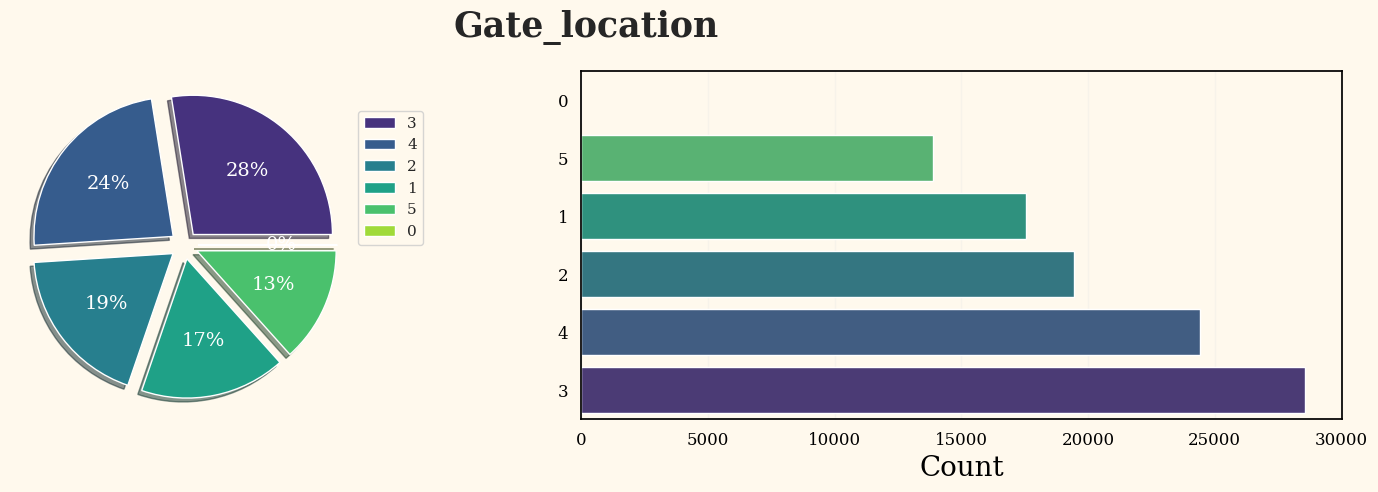

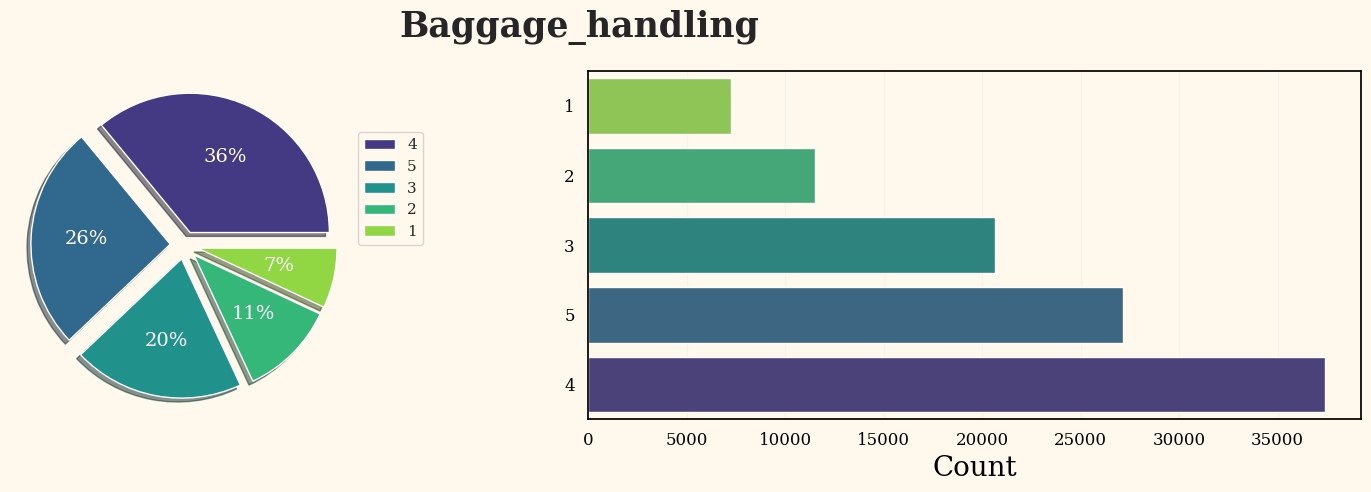

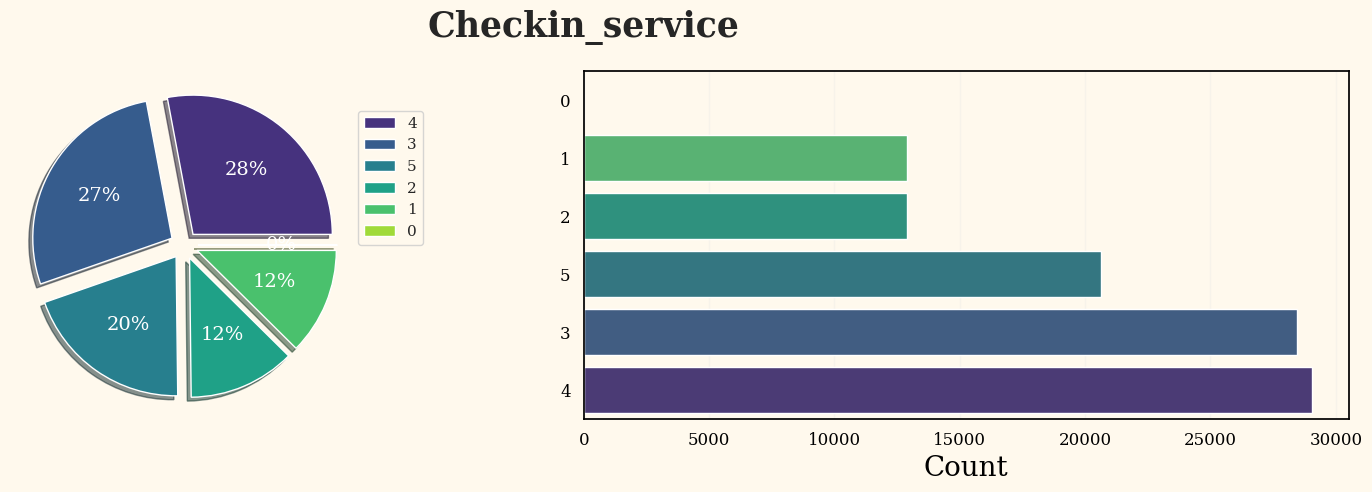

In [ ]:
for x in airport_service[0:3]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax = ax.flatten()

    value_counts = df[x].value_counts()
    labels = value_counts.index.tolist()

    # Plot the pie chart
    pie_colors = sns.color_palette('viridis', len(labels))
    ax[0].pie(
        value_counts,
        shadow=True,
        explode=[.1 for _ in range(value_counts.nunique())],
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].legend(labels, loc=(1.0, 0.5))

    # Plot the count plot
    sns.countplot(data=df, y=x, ax=ax[1], palette=pie_colors[::-1], order=value_counts.index[::-1])
    ax[1].yaxis.label.set_size(20)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=20)
    ax[1].set_ylabel(None)
    plt.xticks(fontsize=12)

    fig.suptitle(x, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


<a id="section_3_7"></a>

## Key Insights For Airport Services

* Most of the customers are not happy with their Gate Location (They might have walked longer than they expected)

* Only 18% of the customers are not happy with the Baggage Handling Service

* Nearly 1/4 of the customers are not satisfied with the Check-in Service

In [ ]:
df.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [ ]:
for col in air_test.columns:
    new_col = col.replace(" ", "_")
    air_test.rename(columns={col: new_col}, inplace=True)

# Eliminate the first 2 columns for row number and identifier
air_test = air_test.drop(columns=['id','Unnamed:_0'])

# Update 'Gender' column to numeric (1 for "Male", 0 for "Female")
air_test['Gender'] = air_test['Gender'].apply(lambda x: 1 if x == "Male" else 0)

# Update 'Customer.Type' column to numeric (1 for "Loyal Customer", 0 for "disloyal Customer")
air_test['Customer_Type'] = air_test['Customer_Type'].apply(lambda x: 1 if x == "Loyal Customer" else 0)

# Update 'Type.of.Travel' column to numeric (1 for "Business travel", 0 for "Personal Travel")
air_test['Type_of_Travel'] = air_test['Type_of_Travel'].apply(lambda x: 1 if x == "Business travel" else 0)

# Create new columns 'Business' and 'EcoPlus' based on the 'Class' column
air_test['Business'] = air_test['Class'].apply(lambda x: 1 if x == "Business" else 0)
air_test['Eco'] = air_test['Class'].apply(lambda x: 1 if x == "Eco" else 0)
air_test['EcoPlus'] = air_test['Class'].apply(lambda x: 1 if x == "Eco Plus" else 0)

# Remove the 'Class' column since 'Business' and 'EcoPlus' columns are created from it
air_test = air_test.drop(columns='Class')

# Update 'satisfaction' column to numeric (1 for "satisfied", 0 for "neutral or dissatisfied")
air_test['satisfaction'] = air_test['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)

# Now, air_test contains the updated numeric columns for the categorical variables


<Axes: >

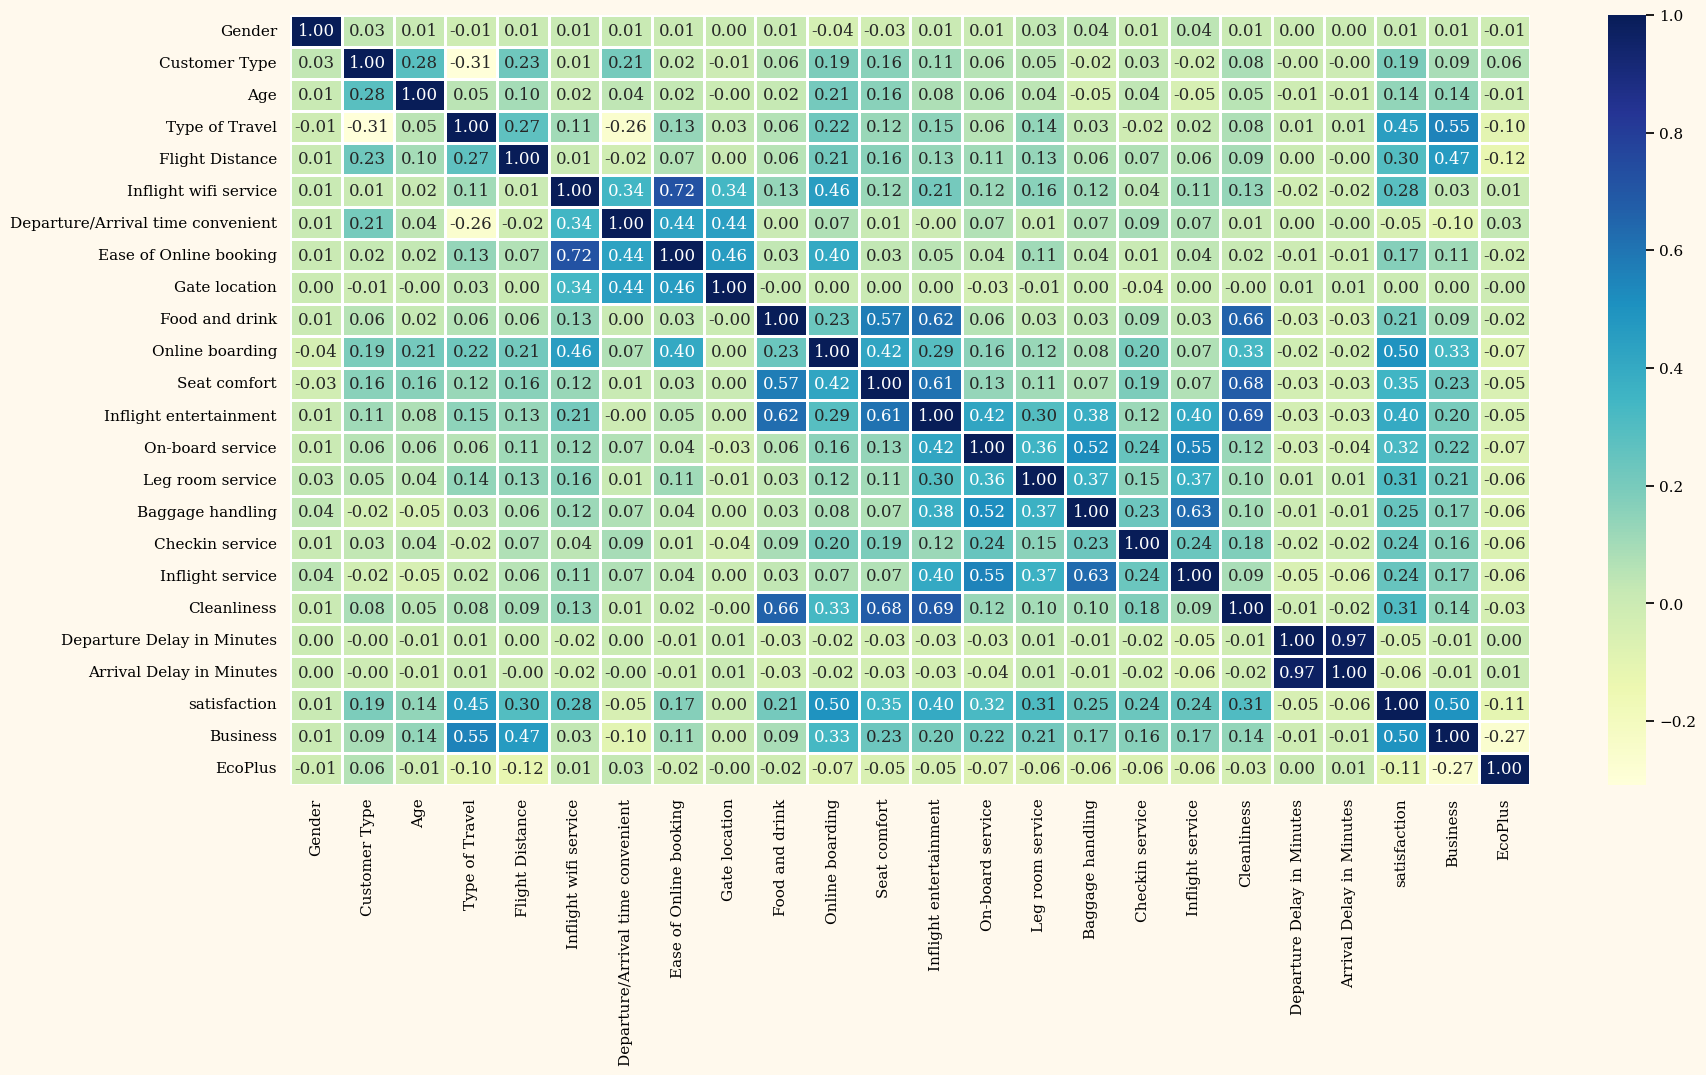

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Training Data
air_training = pd.read_csv('/content/train.csv')

# Update categorical columns to numeric for training data
air_training.drop(columns=['id', 'Unnamed: 0'], inplace=True)

air_training['Gender'] = np.where(air_training['Gender'] == 'Male', 1, 0)
air_training['Customer Type'] = np.where(air_training['Customer Type'] == 'Loyal Customer', 1, 0)
air_training['Type of Travel'] = np.where(air_training['Type of Travel'] == 'Business travel', 1, 0)
air_training['Business'] = np.where(air_training['Class'] == 'Business', 1, 0)
air_training['EcoPlus'] = np.where(air_training['Class'] == 'Eco Plus', 1, 0)
air_training.drop(columns=['Class'], inplace=True)

air_training['satisfaction'] = np.where(air_training['satisfaction'] == 'satisfied', 1, 0)

# Load Test Data
air_test = pd.read_csv('/content/train.csv')

# Update categorical columns to numeric for testing data
air_test.drop(columns=['id', 'Unnamed: 0'], inplace=True)

air_test['Gender'] = np.where(air_test['Gender'] == 'Male', 1, 0)
air_test['Customer Type'] = np.where(air_test['Customer Type'] == 'Loyal Customer', 1, 0)
air_test['Type of Travel'] = np.where(air_test['Type of Travel'] == 'Business travel', 1, 0)
air_test['Business'] = np.where(air_test['Class'] == 'Business', 1, 0)
air_test['EcoPlus'] = np.where(air_test['Class'] == 'Eco Plus', 1, 0)
air_test.drop(columns=['Class'], inplace=True)

air_test['satisfaction'] = np.where(air_test['satisfaction'] == 'satisfied', 1, 0)

# Plot a Correlation Matrix with all relevant variables
cor_matrix = air_training.corr()

plt.figure(figsize=(20,10))  # Adjust the figure size as needed
sns.heatmap(cor_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=2)



In [ ]:
list_1 = [10,20,30,40]
list_1 = list_1.append([50,60])
print(list_1)


None
